In [1]:
#!pip install matplotlib
#!pip install numpy

In [2]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

# 1 Charger de la donnée

Nous allons étudier un dataset représentant la fréquentation quotidienne de 7 pistes cyclables Montréalaises en 2012.

Charger le dataset bikes.csv en utilisant la méthode `read_csv` de pandas. 

Jetez un coup d'oeil à la documentation => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [3]:
df=pd.read_csv('./data/bikes.csv','utf-8',engine='python')

Afficher les 3 premières lignes.

In [4]:
df.head(3)

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


Comme on peut le voir, le dataset n'est pas proprement chargé, toutes les colonnes sont reunies en une. Pour arranger ceci, nous allons utiiser quelques arguments de la méthode `read_csv`.

* changer le separateur de colonne a `;` avec l'option `sep`
* "Parser" la colonne date avec l'option `parse_date`
* Definir la colonne 'Date' comme index du dataframe avec `index_col`

In [5]:
df=pd.read_csv('./data/bikes.csv',sep=';',encoding='iso-8859-1',engine='python',parse_dates=True,index_col="Date")

In [6]:
df

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...
2012-01-11,2405,NaN,1208,1701,3082,2076,165,2461,NaN
2012-02-11,1582,NaN,737,1109,2277,1392,97,1888,NaN
2012-03-11,844,NaN,380,612,1137,713,105,1302,NaN


# 1.1 Sélection d'une colonne

On peut selectionner une colonne (ou plusieurs) d'un dataframe de la même manière que l'on slectionne une clé dans un dictionnaire :
`df['column_name']` or `df[['col1', 'col2', etc]]`

Selectionner la colonne 'Berri 1'

In [7]:
df['Berri 1']

Date
2012-01-01      35
2012-02-01      83
2012-03-01     135
2012-04-01     144
2012-05-01     197
              ... 
2012-01-11    2405
2012-02-11    1582
2012-03-11     844
2012-04-11     966
2012-05-11    2247
Name: Berri 1, Length: 310, dtype: int64

# 1.2 "Plotter" une colonne

Utiliser la méthode `.plot()` pour produire une graphique del la frequentation de la piste tout au long de l'année.

On remarque sans surprise que peu de gens prennent le vélo en hiver.

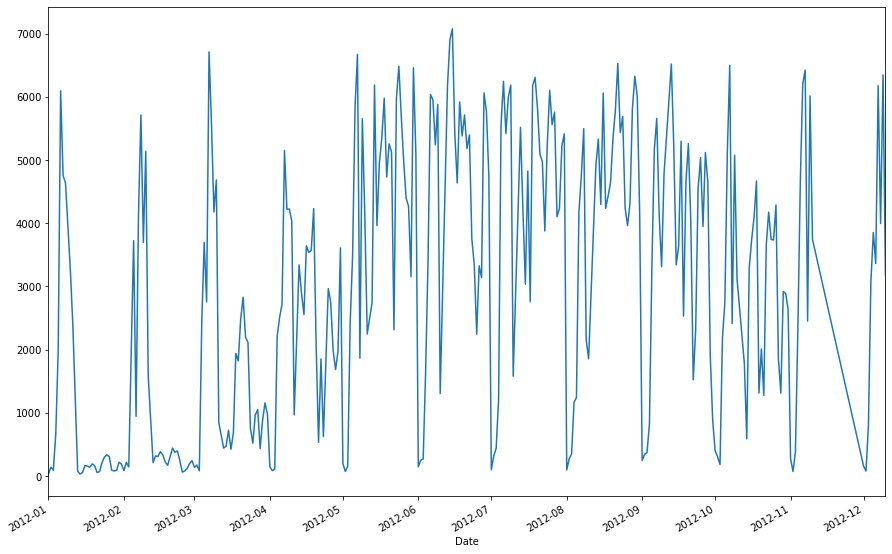

In [8]:
df['Berri 1'].plot()

On peut aussi plotter toutes les colonnes du dataframe en utilisant le même mechanisme.

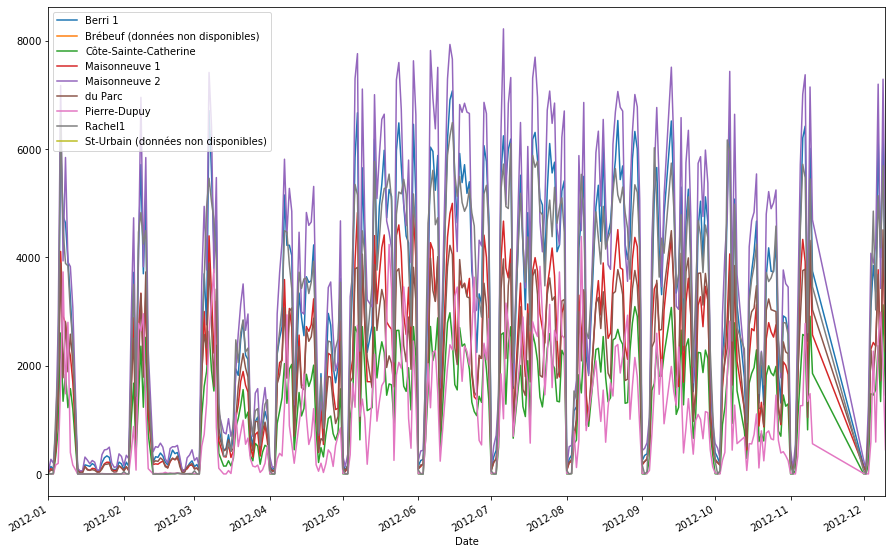

In [9]:
df.plot()

Cependant, c'est un peu illisible... Utiliser l'option `subplots=True` pour séparer les courbes.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1f5fa7430>,
      dtype=object)

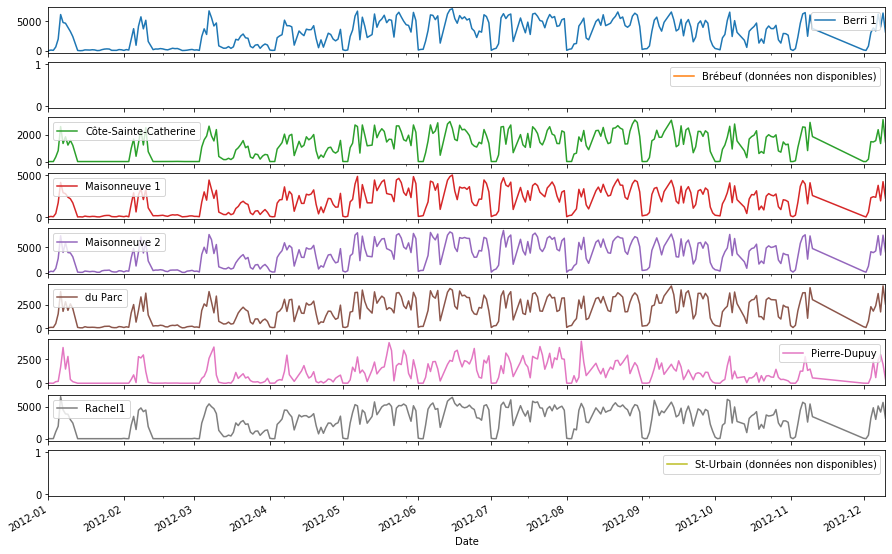

In [10]:
df.plot(subplots=True)

# 2 Premières analyses

Dans cette partie nous allons utiliser un nouveau jeu de données plus volumineux, représentant les appels au service 311 de la ville de New York.

Charger le fichier '311-service-requests.csv' dans un dataframe pandas.

In [11]:
df = pd.read_csv('./data/311-service-requests.csv',low_memory=False)

In [12]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"


# 2.1 Description du df

Explorer le dataframe avec les methodes .info(), .summary(), .describe()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
Unique Key                        111069 non-null int64
Created Date                      111069 non-null object
Closed Date                       60270 non-null object
Agency                            111069 non-null object
Agency Name                       111069 non-null object
Complaint Type                    111069 non-null object
Descriptor                        110613 non-null object
Location Type                     79022 non-null object
Incident Zip                      98807 non-null object
Incident Address                  84441 non-null object
Street Name                       84432 non-null object
Cross Street 1                    84728 non-null object
Cross Street 2                    84005 non-null object
Intersection Street 1             19364 non-null object
Intersection Street 2             19366 non-null object
Address Type                      102247 non

In [14]:
df.describe()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
count,1.110690e+05,9.814300e+04,98143.000000,0.0,98143.000000,98143.000000
mean,2.651565e+07,1.004544e+06,205553.153287,NaN,40.730821,-73.926738
std,4.694558e+04,2.206087e+04,31334.677543,NaN,0.086006,0.079563
min,2.642588e+07,9.134950e+05,121152.000000,NaN,40.498949,-74.254437
25%,2.647433e+07,9.920490e+05,182506.000000,NaN,40.667529,-73.971882
50%,2.651472e+07,1.003205e+06,203251.000000,NaN,40.724521,-73.931580
75%,2.655684e+07,1.016823e+06,233366.000000,NaN,40.807183,-73.882430
max,2.659613e+07,1.067024e+06,271485.000000,NaN,40.911792,-73.701278


# 2.2 Sélectionner des colonnes et des lignes

Selectionner la colonne 'Complaint Type'.

In [15]:
df["Complaint Type"]

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

Afficher les 5 premieres ligne de la colonne 'Complaint Type'.

In [16]:
df["Complaint Type"].head(5)

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

Créer un nouveau dataframe avec seulement les lignes ayant la valeur 'HEATING' dans la colonne 'Complaint Type'.

In [17]:
df[df["Complaint Type"] == "HEATING"]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
59,26591688,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10453,150 WEST 179 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.855415,-73.913565,"(40.855414830918306, -73.91356461276855)"
61,26593638,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10456,1175 MORRIS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.832549,-73.914527,"(40.83254938306124, -73.9145266364985)"
62,26594900,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10469,917 MACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863103,-73.860912,"(40.86310343131708, -73.86091223589236)"
64,26591211,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10032,505 WEST 161 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835574,-73.940701,"(40.83557401610241, -73.94070113438576)"
3323,26593331,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11206,33 MONTROSE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.706798,-73.948884,"(40.70679752211721, -73.94888414735604)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107708,26441563,10/05/2013 12:00:00 AM,10/08/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10472,1742 EAST 172 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.832584,-73.869201,"(40.83258373587881, -73.86920068822464)"
107709,26441561,10/05/2013 12:00:00 AM,10/08/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10472,1742 EAST 172 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.832584,-73.869201,"(40.83258373587881, -73.86920068822464)"
107731,26441131,10/05/2013 12:00:00 AM,10/09/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10034,97 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863805,-73.925358,"(40.863805379005, -73.92535778152539)"
107734,26442050,10/05/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10031,516 WEST 143 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.824339,-73.949527,"(40.82433861263122, -73.94952733420679)"


In [18]:
df.loc[df['Complaint Type'] == 'HEATING']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
59,26591688,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10453,150 WEST 179 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.855415,-73.913565,"(40.855414830918306, -73.91356461276855)"
61,26593638,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10456,1175 MORRIS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.832549,-73.914527,"(40.83254938306124, -73.9145266364985)"
62,26594900,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10469,917 MACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863103,-73.860912,"(40.86310343131708, -73.86091223589236)"
64,26591211,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10032,505 WEST 161 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835574,-73.940701,"(40.83557401610241, -73.94070113438576)"
3323,26593331,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11206,33 MONTROSE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.706798,-73.948884,"(40.70679752211721, -73.94888414735604)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107708,26441563,10/05/2013 12:00:00 AM,10/08/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10472,1742 EAST 172 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.832584,-73.869201,"(40.83258373587881, -73.86920068822464)"
107709,26441561,10/05/2013 12:00:00 AM,10/08/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10472,1742 EAST 172 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.832584,-73.869201,"(40.83258373587881, -73.86920068822464)"
107731,26441131,10/05/2013 12:00:00 AM,10/09/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10034,97 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863805,-73.925358,"(40.863805379005, -73.92535778152539)"
107734,26442050,10/05/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10031,516 WEST 143 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.824339,-73.949527,"(40.82433861263122, -73.94952733420679)"


# 2.3 Sélection de plusieurs colonnes

Afficher tous les noms de colonnes.

In [19]:
df.keys()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

Créer un nouveaux dataset en selectionnant les colonnes 'Created Date', 'Closed Date', 'Complaint Type', 'Incident Address' et 'Street Name'

In [20]:
df[["Created Date","Closed Date","Complaint Type","Incident Address","Street Name"]]

,Created Date,Closed Date,Complaint Type,Incident Address,Street Name
0,10/31/2013 02:08:41 AM,NaN,Noise - Street/Sidewalk,90-03 169 STREET,169 STREET
1,10/31/2013 02:01:04 AM,NaN,Illegal Parking,58 AVENUE,58 AVENUE
2,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,Noise - Commercial,4060 BROADWAY,BROADWAY
3,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,Noise - Vehicle,WEST 72 STREET,WEST 72 STREET
4,10/31/2013 01:53:44 AM,NaN,Rodent,WEST 124 STREET,WEST 124 STREET
...,...,...,...,...,...
111064,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,Maintenance or Facility,NaN,NaN
111065,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,Illegal Parking,NaN,NaN
111066,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,Noise - Street/Sidewalk,344 EAST 28 STREET,EAST 28 STREET
111067,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,Noise - Commercial,1233 FLATBUSH AVENUE,FLATBUSH AVENUE


# 2.4 Quelles est la plainte qui revient le plus souvent?

Utiliser la méthode groupby pour compter le nombre de plaintes pour chaque type de plainte.

In [21]:
countPlaint = df.groupby("Complaint Type")

In [22]:
complaint = countPlaint["Unique Key"].count()

Utiliser la methode .sort() et afficher le top 10 des types de plainte avec le plus d'enregistremments.

In [23]:
topComplaints = complaint.sort_values(ascending=False).head(10)

In [24]:
topComplaints = pd.DataFrame(topComplaints)
topComplaints = topComplaints.reset_index()
topComplaints

,Complaint Type,Unique Key
0,HEATING,14200
1,GENERAL CONSTRUCTION,7471
2,Street Light Condition,7117
3,DOF Literature Request,5797
4,PLUMBING,5373
5,PAINT - PLASTER,5149
6,Blocked Driveway,4590
7,NONCONST,3998
8,Street Condition,3473
9,Illegal Parking,3343


Utiliser la librairie matplotlib pour produire un graphique en barre de ce top 10.

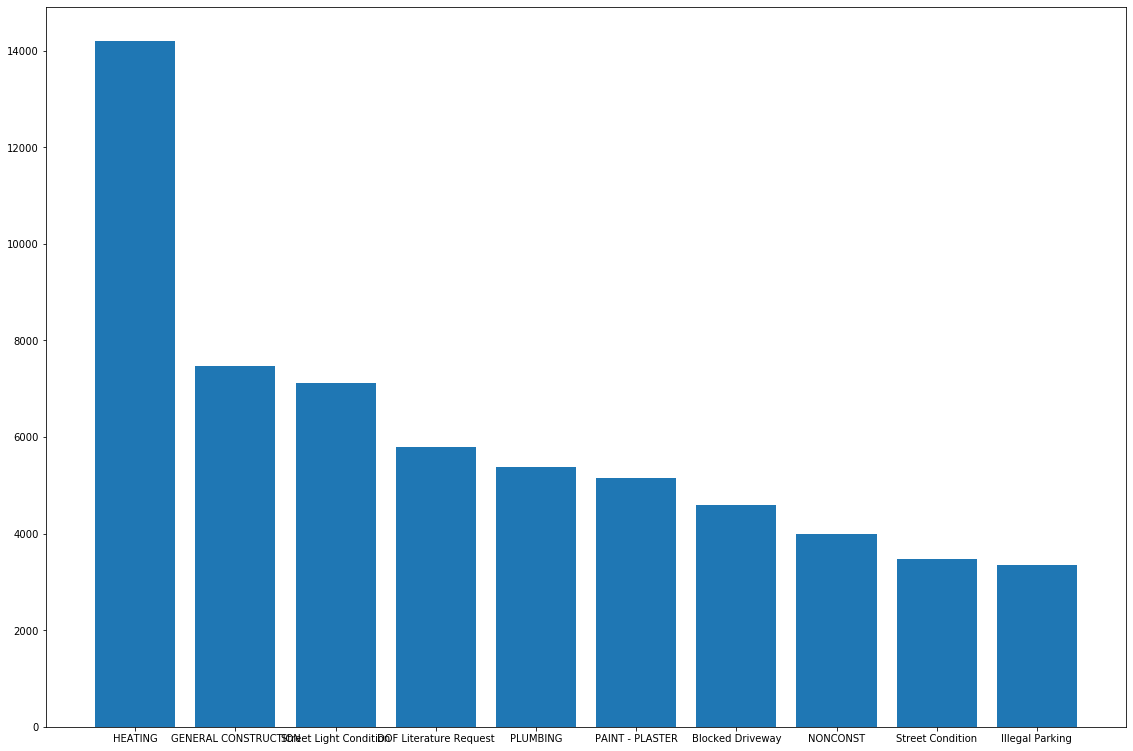

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = topComplaints["Complaint Type"]
y=topComplaints["Unique Key"]
ax.bar(x,y)
plt.show()

Utiliser la librairie matplotlib pour produire un camenbert avec les pourcentages représentant la proportion de chaque type de plainte.

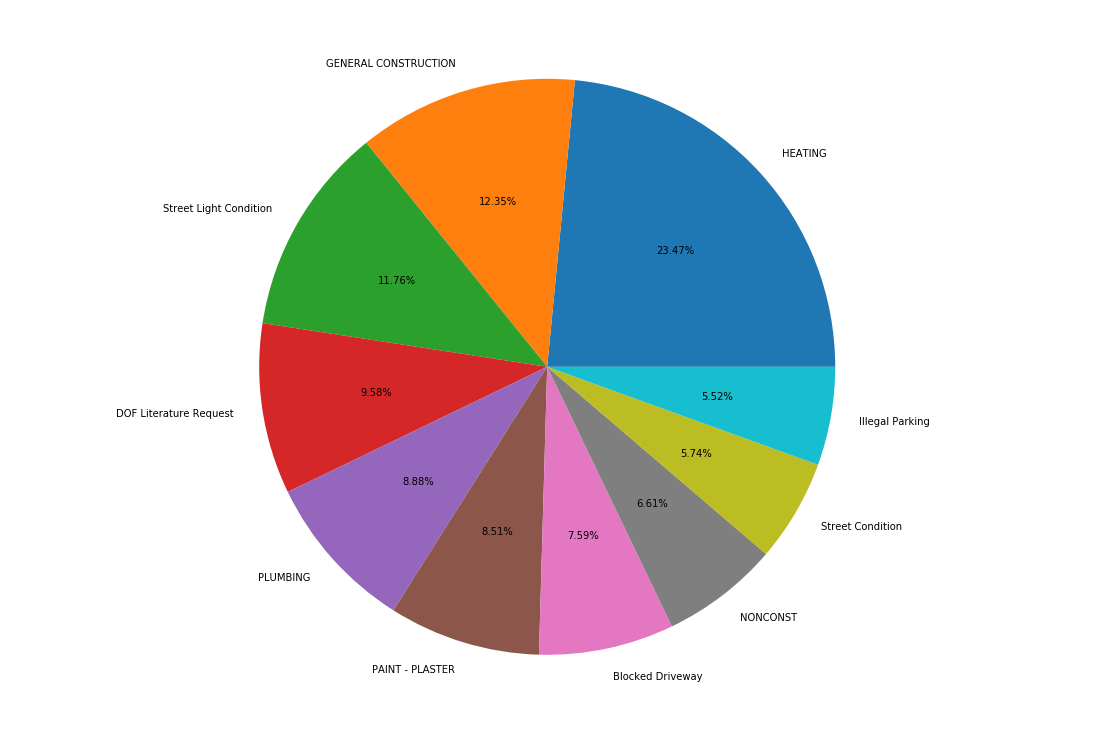

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
x = topComplaints["Complaint Type"]
y= topComplaints["Unique Key"]
ax.pie(y,labels = x, autopct='%1.2f%%')
plt.show()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  